Importing

In [5]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [6]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [7]:
%run "src/dataloading.ipynb"
%run "src/training.ipynb"
%run "src/evaluate.ipynb"
%run "src/visualizations.ipynb"
%run "model_architectures.ipynb"

ModuleNotFoundError: No module named 'nbformat'

Training

In [ ]:
model_config_file = open('configs/model_configs.json')
model_configs = json.load(model_config_file)
current_model_configs = model_configs[model_configs['current-model']]

epochs = current_model_configs['epoch-count']

match model_configs['current-model']:
    case 'CNN':
        model = MRI_CNN
    case 'ResNet':
        model = MRI_ResNet
    case 'ResNet2':
        model = MRI_ResNet2
    case 'AlexNet':
        model = MRI_AlexNet
    case _:
        model = MRI_CNN
match current_model_configs['loss-function']:
    case 'cross-entropy':
        criterion = nn.CrossEntropyLoss()
    case _:
        criterion = nn.CrossEntropyLoss()
match current_model_configs['optimizer']:
    case 'adam':
        optimizer = optim.Adam
    case 'adamW':
        optimizer = optim.AdamW
    case _:
        optimizer = optim.Adam

model = model(**current_model_configs['model-hyperparameters']).to(device)
optimizer = optimizer(model.parameters(), lr=current_model_configs['optimizer-lr'])

In [ ]:
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:   5%|▌         | 1/20 [00:08<02:36,  8.23s/epoch]

Epoch [1/20] Train Loss: 0.9922 Train Accuracy: 61.01% Validation Loss: 2.2152 Validation Accuracy: 43.13%


Training:  10%|█         | 2/20 [00:14<02:06,  7.01s/epoch]

Epoch [2/20] Train Loss: 0.5847 Train Accuracy: 78.19% Validation Loss: 1.2439 Validation Accuracy: 64.46%


Training:  15%|█▌        | 3/20 [00:20<01:54,  6.73s/epoch]

Epoch [3/20] Train Loss: 0.3062 Train Accuracy: 90.15% Validation Loss: 1.0715 Validation Accuracy: 66.72%


Training:  20%|██        | 4/20 [00:27<01:44,  6.56s/epoch]

Epoch [4/20] Train Loss: 0.1293 Train Accuracy: 96.93% Validation Loss: 0.9242 Validation Accuracy: 71.73%


Training:  25%|██▌       | 5/20 [00:33<01:36,  6.42s/epoch]

Epoch [5/20] Train Loss: 0.1348 Train Accuracy: 96.50% Validation Loss: 1.2395 Validation Accuracy: 67.53%


Training:  30%|███       | 6/20 [00:39<01:28,  6.32s/epoch]

Epoch [6/20] Train Loss: 0.1384 Train Accuracy: 96.45% Validation Loss: 0.9947 Validation Accuracy: 70.92%


Training:  35%|███▌      | 7/20 [00:45<01:21,  6.25s/epoch]

Epoch [7/20] Train Loss: 0.0757 Train Accuracy: 98.17% Validation Loss: 0.6939 Validation Accuracy: 81.10%


Training:  40%|████      | 8/20 [00:51<01:14,  6.23s/epoch]

Epoch [8/20] Train Loss: 0.0557 Train Accuracy: 99.41% Validation Loss: 0.4980 Validation Accuracy: 84.17%


Training:  45%|████▌     | 9/20 [00:57<01:07,  6.18s/epoch]

Epoch [9/20] Train Loss: 0.0665 Train Accuracy: 99.57% Validation Loss: 0.5563 Validation Accuracy: 81.26%


Training:  50%|█████     | 10/20 [01:03<01:01,  6.16s/epoch]

Epoch [10/20] Train Loss: 0.0416 Train Accuracy: 99.41% Validation Loss: 0.7160 Validation Accuracy: 77.71%


Training:  55%|█████▌    | 11/20 [01:10<00:55,  6.16s/epoch]

Epoch [11/20] Train Loss: 0.0274 Train Accuracy: 99.62% Validation Loss: 0.5219 Validation Accuracy: 84.98%


Training:  60%|██████    | 12/20 [01:16<00:49,  6.19s/epoch]

Epoch [12/20] Train Loss: 0.0178 Train Accuracy: 99.84% Validation Loss: 0.5383 Validation Accuracy: 83.04%


Training:  65%|██████▌   | 13/20 [01:22<00:43,  6.19s/epoch]

Epoch [13/20] Train Loss: 0.0488 Train Accuracy: 99.89% Validation Loss: 0.6105 Validation Accuracy: 83.04%


Training:  70%|███████   | 14/20 [01:28<00:37,  6.26s/epoch]

Epoch [14/20] Train Loss: 0.0421 Train Accuracy: 99.62% Validation Loss: 0.5036 Validation Accuracy: 84.01%


Training:  75%|███████▌  | 15/20 [01:35<00:31,  6.26s/epoch]

Epoch [15/20] Train Loss: 0.0252 Train Accuracy: 99.84% Validation Loss: 0.5224 Validation Accuracy: 83.52%


Training:  80%|████████  | 16/20 [01:41<00:25,  6.27s/epoch]

Epoch [16/20] Train Loss: 0.0402 Train Accuracy: 99.95% Validation Loss: 0.5560 Validation Accuracy: 85.30%


Training:  85%|████████▌ | 17/20 [01:47<00:18,  6.26s/epoch]

Epoch [17/20] Train Loss: 0.0156 Train Accuracy: 100.00% Validation Loss: 0.5251 Validation Accuracy: 85.46%


Training:  90%|█████████ | 18/20 [01:53<00:12,  6.27s/epoch]

Epoch [18/20] Train Loss: 0.0380 Train Accuracy: 99.73% Validation Loss: 0.6325 Validation Accuracy: 81.42%


Training:  95%|█████████▌| 19/20 [02:00<00:06,  6.25s/epoch]

Epoch [19/20] Train Loss: 0.0500 Train Accuracy: 98.76% Validation Loss: 1.2549 Validation Accuracy: 70.27%


Training: 100%|██████████| 20/20 [02:06<00:00,  6.32s/epoch]

Epoch [20/20] Train Loss: 0.1462 Train Accuracy: 95.42% Validation Loss: 0.9867 Validation Accuracy: 69.31%


In [ ]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:   5%|▌         | 1/20 [00:01<00:20,  1.08s/epoch]

Testing Epoch [1/20] Test Loss: 0.9174 Test Accuracy: 72.26% Time per Epoch: 1.08 seconds


Testing:  10%|█         | 2/20 [00:02<00:19,  1.07s/epoch]

Testing Epoch [2/20] Test Loss: 0.9222 Test Accuracy: 72.26% Time per Epoch: 1.05 seconds


Testing:  15%|█▌        | 3/20 [00:03<00:18,  1.07s/epoch]

Testing Epoch [3/20] Test Loss: 0.9287 Test Accuracy: 72.26% Time per Epoch: 1.07 seconds


Testing:  20%|██        | 4/20 [00:04<00:16,  1.05s/epoch]

Testing Epoch [4/20] Test Loss: 0.9128 Test Accuracy: 72.26% Time per Epoch: 1.02 seconds


Testing:  25%|██▌       | 5/20 [00:05<00:15,  1.02s/epoch]

Testing Epoch [5/20] Test Loss: 0.9379 Test Accuracy: 72.26% Time per Epoch: 0.97 seconds


Testing:  30%|███       | 6/20 [00:06<00:14,  1.02s/epoch]

Testing Epoch [6/20] Test Loss: 0.9014 Test Accuracy: 72.26% Time per Epoch: 1.00 seconds


Testing:  35%|███▌      | 7/20 [00:07<00:13,  1.00s/epoch]

Testing Epoch [7/20] Test Loss: 0.9283 Test Accuracy: 72.26% Time per Epoch: 0.97 seconds


Testing:  40%|████      | 8/20 [00:08<00:11,  1.01epoch/s]

Testing Epoch [8/20] Test Loss: 0.9048 Test Accuracy: 72.26% Time per Epoch: 0.96 seconds


Testing:  45%|████▌     | 9/20 [00:09<00:10,  1.02epoch/s]

Testing Epoch [9/20] Test Loss: 0.9220 Test Accuracy: 72.26% Time per Epoch: 0.95 seconds


Testing:  50%|█████     | 10/20 [00:10<00:09,  1.02epoch/s]

Testing Epoch [10/20] Test Loss: 0.9246 Test Accuracy: 72.26% Time per Epoch: 0.98 seconds


Testing:  55%|█████▌    | 11/20 [00:11<00:08,  1.00epoch/s]

Testing Epoch [11/20] Test Loss: 0.9526 Test Accuracy: 72.26% Time per Epoch: 1.04 seconds


Testing:  60%|██████    | 12/20 [00:12<00:07,  1.00epoch/s]

Testing Epoch [12/20] Test Loss: 0.9339 Test Accuracy: 72.26% Time per Epoch: 0.99 seconds


Testing:  65%|██████▌   | 13/20 [00:13<00:07,  1.02s/epoch]

Testing Epoch [13/20] Test Loss: 0.9050 Test Accuracy: 72.26% Time per Epoch: 1.07 seconds


Testing:  70%|███████   | 14/20 [00:14<00:06,  1.13s/epoch]

Testing Epoch [14/20] Test Loss: 0.9013 Test Accuracy: 72.26% Time per Epoch: 1.37 seconds


Testing:  75%|███████▌  | 15/20 [00:15<00:05,  1.19s/epoch]

Testing Epoch [15/20] Test Loss: 0.9145 Test Accuracy: 72.26% Time per Epoch: 1.35 seconds


Testing:  80%|████████  | 16/20 [00:17<00:04,  1.24s/epoch]

Testing Epoch [16/20] Test Loss: 0.9347 Test Accuracy: 72.26% Time per Epoch: 1.36 seconds


Testing:  85%|████████▌ | 17/20 [00:18<00:03,  1.28s/epoch]

Testing Epoch [17/20] Test Loss: 0.9272 Test Accuracy: 72.26% Time per Epoch: 1.34 seconds


Testing:  90%|█████████ | 18/20 [00:19<00:02,  1.25s/epoch]

Testing Epoch [18/20] Test Loss: 0.9265 Test Accuracy: 72.26% Time per Epoch: 1.20 seconds


Testing:  95%|█████████▌| 19/20 [00:21<00:01,  1.32s/epoch]

Testing Epoch [19/20] Test Loss: 0.9003 Test Accuracy: 72.26% Time per Epoch: 1.45 seconds


Testing: 100%|██████████| 20/20 [00:22<00:00,  1.14s/epoch]

Testing Epoch [20/20] Test Loss: 0.9331 Test Accuracy: 72.26% Time per Epoch: 1.41 seconds
Average Test Loss: 0.9215
Average Test Accuracy: 72.26%


Model Classification:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       546
           1       0.95      0.94      0.94       560
           2       0.98      0.98      0.98       254
           3       0.95      0.98      0.96       497

    accuracy                           0.95      1857
   macro avg       0.96      0.96      0.96      1857
weighted avg       0.95      0.95      0.95      1857

              precision    recall  f1-score   support

           0       0.59      0.87      0.70       169
           1       0.65      0.67      0.66       175
           2       0.82      0.88      0.85        97
           3       0.95      0.45      0.61       178

    accuracy                           0.69       619
   macro avg       0.75      0.72      0.70       619
weighted avg       0.75      0.69      0.69       619

              precision    recall  f1-score   support

           0       0.65      0.90      0.75       186
           1       0.

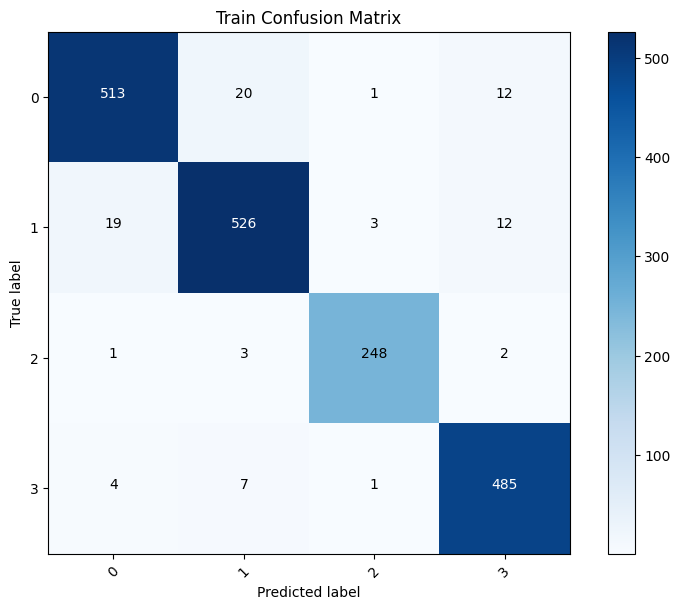

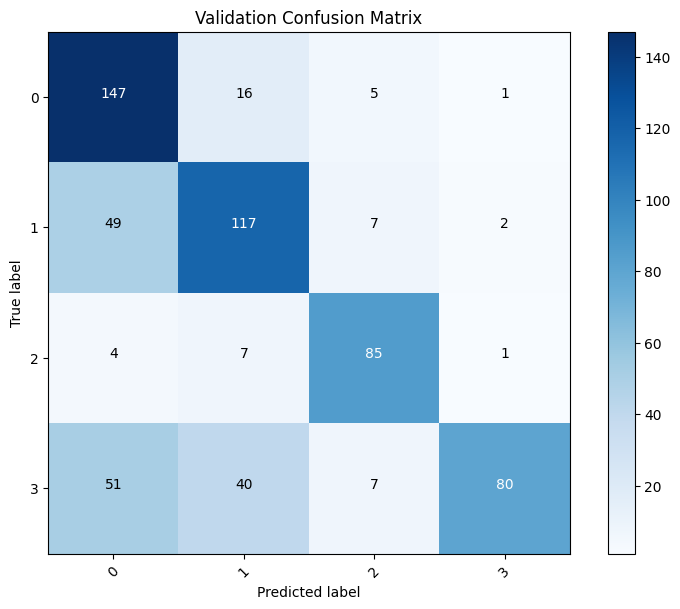

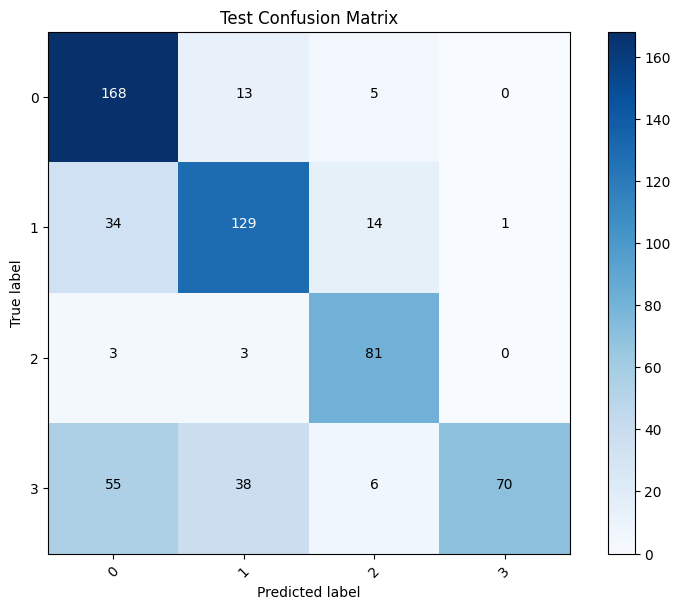

In [ ]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

print(classification_report(train_labels, train_preds))
print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)]  # Update with your class names
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()